In [1]:
# 不适定问题：决策边界不唯一，可能会偏向某一样本类型，模型泛化能力较差；
# 对于这种个问题，这种方法找到的决策边界，对应的模型的泛化能力较好

<img src="./图片/svm.png">

In [1]:
# SVM 算法本质就是要最大化 margin；

In [2]:
# 不管是讨论逻辑回归算法还是 SVM 算法，前提是：样本分布线性可分；
# 线性可分：对于特征空间，存在一条直线或一个平面将样本完全分开

In [3]:
# 解决线性可分问题的 SVM 算法；


# 非常严格的，确实找到了一个决策边界，没有错误的将样本点进行了划分，同时最大化了 margin 的值；

In [4]:
# Soft Margin SVM：
# 解决线性不可分的问题；


# 实践中，大多真实的样本数据是线性不可分的；
# Soft Margin SVM 算法是从 Hard Margin SVM 的基础上改进的；

<img src= "./图片/点到直线的距离.png">

In [7]:
# 假设对于严格线性可分的问题：
# 这里我们简单推导一下，假设样本为x，系数是θ，最终要求的哪条决策直线方程为 θ^T * x= 0 对吧
# 做一个变形，w^T * x + b = 0,  将截距露出来

# 假设y的两个分类为1和-1,也就是   y^(i) = 1,-1
# 那么所有的点到这条决策边界的距离都要大于d
# |w^T * x + b| / ||w|| >d

# 两边除以d, 得到下面的方程，
# wd = w / (d*||w||)

<img src="./图片/决策边界和支撑向量.png">

In [9]:
# 最终我们就是要求argmax {d} = argmax{支撑向量到决策边界的距离} = {|wd^T * x + bd| / ||w||} 对吧，其中x表示支撑向量上的任意一点，
# 也就是说，对于这样的x，满足|wb^T * x + bd| = 1 是吧（在支撑向量的直线上）

# 不过为了方便，通常将wd 和bd直接用w和b表示，不过要记住他们之间的关系。
# wd = w / (d*||w||)

In [10]:
"""
所以最后 SVM就变成了一个带条件的约束问题

目标： max {1 / ||w||} == min {||w||}
        s.t.   y^(i)*(w^T * x_i + b) >= 1   # 这个条件的意思是，svm要有满足两条支撑向量，也就是所有的点都在这两条支撑向量的外侧。
        
        不过我们一般转换一下min
        min{1/2*||w||^2}
        
注意：这里的w和b是指wd和bd哦

"""
# 没有前提条件的最优化，称为全局最优化；
# 全局最优化问题：直接对目标函数求导，让导数等于 0，相应的极值点就有可能是所要求的最大值或者最小值；

# 条件的最优化问题，在最优化领域，解决该问题的方法与没有条件的最优化问题差异很大；
# 有条件的最优化问题：较复杂，需要使用拉布拉斯算子进行求解；

# 拉普拉斯算子（Laplace Operator）是n维欧几里德空间中的一个二阶微分算子，定义为梯度（▽f）的散度（▽·f）

'\n所以最后 SVM就变成了一个带条件的约束问题\n\n目标： max {1 / ||w||} == min {||w||}\n        s.t.   y^(i)*(w^T * x_i + b) >= 1   # 这个条件的意思是，svm要满足两条支撑向量\n        \n        不过我们一般转换一下min\n        min{1/2*||w||^2}\n        \n注意：这里的w和b是指wd和bd哦\n\n'

#### soft margin

In [12]:
# 线性不可分问题 

In [1]:
# 我们扩展一下hard-margin svm的条件。s.t.   y^(i)*(w^T * x_i + b) >= 1 。如果两个样本点有个别在对方的里面，根本没法用一条直线完全的区分
# 开来，那么我们可以考虑添加一个容错值ζ，也就是在这条支撑向量外头也认可。
# 模型允许模型犯一定的错误，允许一些样本分布在虚线与 =1 的直线之间；

In [ ]:
# ζ不是 一个固定的值，对任意一个样本 x(i) 都有一个 ζi 与其对应；如果有 m 个样本点，则有 m 个 ζ 值，每一个样本都有其容错空间；
# ζ要做的是，希望模型有一定的容错空间，但范围不能太大；
# 怎么表示容错空间不能太大？

In [ ]:
# 更改目标函数，两部分之间取得平衡；

<img src="./图片/soft-margin正则化.png">

In [4]:
# C = 1：两者比重相同；
# C > 1：主要优化后半部分；
# C < 1：主要优化前半部分；
# C 越大，容错空间越小；C 越小，容错空间越大； C=无穷大时，ζ就无穷小，这样就退化成hard-margin

In [6]:
# 正则化的目的：使模型针对训练数据集有更高的容错能力，使得模型对训练数据集中的极端样本点不那么敏感，进而提升模型的泛化能力；


# 思想：所谓的正则化，本质是一个概念，并不是对于所有的模型添加了正则项都是同样的 L1 范式、L2 范式；对于有些模型，需要改变正则化的策略；
# 但是正则化所要实现的效果是一样的——提升模型的泛化能力。

#### 数据归一化

In [7]:
# Hard Margin SVM 和 Soft Margin SVM 都是解决线性分类问题，无论是线性可分的问题，还是线性不可分的问题；
# 和 kNN 算法一样，使用 SVM 算法前，要对数据做标准化处理；

# 原因：SVM 算法中设计到计算 Margin 距离，如果数据点在不同的维度上的量纲不同，会使得距离的计算有问题；
# 例如：样本的两种特征，如果相差太大，使用 SVM 经过计算得到的决策边界几乎为一条水平的直线——
# 因为两种特征的数据量纲相差太大，水平方向的距离可以忽略，因此，得到的最大的 Margin 就是两条虚线的垂直距离；

In [9]:
"""
只要涉及到距离的计算，就要进行数据归一化，保证数据在同一维度。
"""

'\n只要涉及到距离的计算，就要进行数据归一化，保证数据在同一维度。\n'

### sklearn中使用SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

# 为了可视化，取前两列
X = X[y<2,:2]
y = y[y<2]

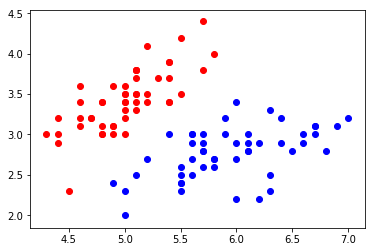

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()

In [4]:
# 数据归一化
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)

X_standard = standardScaler.transform(X)

In [5]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [6]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, 5, cmap=custom_cmap)

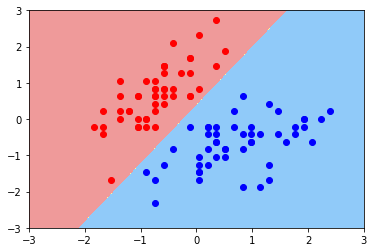

In [7]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

In [8]:
# C越小容错空间越大
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

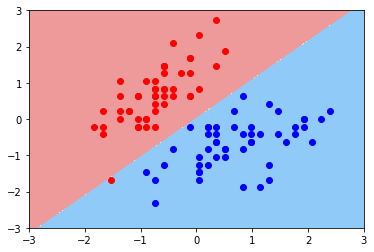

In [9]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

In [10]:
svc.coef_
# 注意sklearn封装的svm可以处理多分类问题，所以这里是一个二维数组
# 二维数组中的每维都表示一条直线。因为这里我们是二分类，所以只有
# 一条直线。

array([[ 4.03236275, -2.50697189]])

In [11]:
svc2.intercept_

array([0.00592584])

In [22]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, 5, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w[0] * x0 + w[1] * x1 + b = 0     决策直线
    # w[0] * x0 + w[1] * x1 + b = ±1   支撑直线
    
    # x1 = -w[0]/w[1] * x0 - b/w[1]     决策直线
    # x1 = -w[0]/w[1] * x0 - b/w[1] ± 1/w[1]  支撑直线
    
    # 绘制决策边界
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1] # 上面的支撑直线，将x1看成y
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1] # 下面的支撑直线，将x2看成y
    
    # up_y或者down_y可能超过了绘制的axis的坐标范围
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color = 'black')
    plt.plot(plot_x[down_index], down_y[down_index], color = 'black')

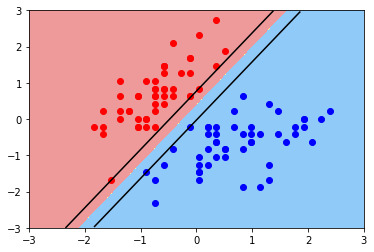

In [23]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

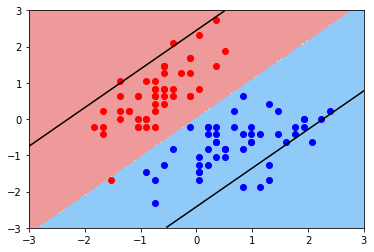

In [24]:
# 看下c=0.01的情况
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

In [30]:
# 有很多的样本点都被划到了决策边界里面，说明此时svc有大的容错空间
# 现象：Margin 非常大，中间容错了很多样本点；
# 原因：C 超参数过小，模型容错空间过大；
# 方案：调参

#### SVM使用多项式特征

In [32]:
# 非线性分类

import numpy as np
import matplotlib.pyplot as plt

In [38]:
from sklearn import datasets

X, y = datasets.make_moons()
# datasets.make_ + 后缀：自动生成数据集；
# 顾名思义 moons 绘制月亮形状

In [34]:
X.shape

(100, 2)

In [35]:
y.shape

(100,)

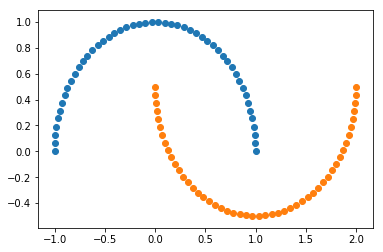

In [36]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

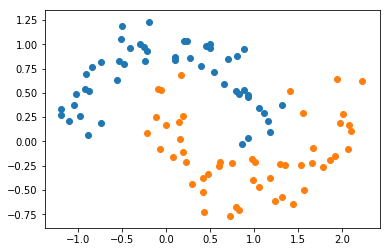

In [43]:
# 添加噪声
X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

#### 使用多项式特征的SVM

In [44]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.svm import LinearSVC

# 创建一个pipeline，管道执行
def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std)scaler', StandardScaler()),
        ('linearSVC', LinearSVC(C=C))
    ])

In [45]:
poly_svc = PolynomialSVC(degree=3)

In [46]:
poly_svc.fit(X, y)
# 更上面一样，只看决策边界，这里不做预测

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std)scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

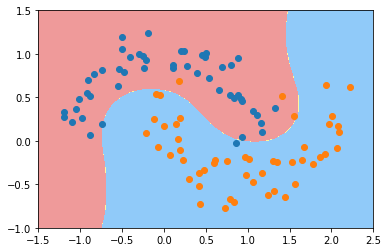

In [47]:
plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [48]:
# 改变参数：degree、C，模型的决策边界也跟着改变；

#### 多项式核

In [50]:
# 对于SVM算法，在scikit-learn的封装中，可以不使用 PolynomialFeatures的方式先将数据转化为高维的具有多项式特征的数据，在将数据提供给算法;
# SVC() 算法：直接使用多项式特征； 

In [56]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        # 当算法SVC()的参数 kernel='poly'时，SVC()能直接打到一种多项式特征的效果；
        # 使用 SVC() 前，也需要对数据进行标准化处理
        ('kernelSVC', SVC(kernel='poly', degree=degree, C=C))
    ])

In [57]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)

In [58]:
poly_kernel_svc.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernelSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

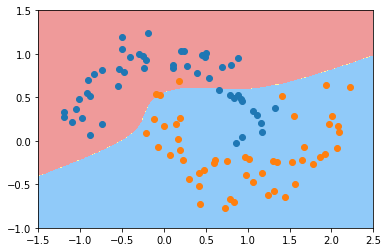

In [59]:
plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

#### 什么是核函数

<img src="./图片/SVM目标函数2.png">

In [6]:
# 我们看变形后的SVM最优化问题，也就是右边的部分，里面有个x_,x_j，以前的添加多项式想的做法是啥样？
# 是不是就是先将x_i添加其高次项x_i^2等等，然后再将这些高次样本作为新的样本传入线性分类器。那么这里
# 我们想想，有没有可能找打一个函数K，我不进行这个添加，而直接对原样本数据x_i,x_j进行变换得到高次的x_i,x_j。
# 我们看原来的x_i*x_j对吧，这里我们直接用K（x_i,x_j）返回点乘：x' . y' 得到的值
# 添加高次项的效果呢？ 答案是有的

# K(x, y)：表示样本 x 和 y，添加多项式特征得到新的样本 x'、y'，K(x, y) 就是返回新的样本经过计算得到的值；
# 在 SVM 类型的算法 SVC() 中，K(x, y) 返回点乘：x' . y' 得到的值；

# 比如我们的多项式核：
# K(x,y) = (x*y + 1)^d，  x和y是向量  d大于1就表示多项式核

# 为什么要做核函数变换，其实这里是一个trick，做了转换之后，不仅节省了存储空间，更加利于计算。

In [ ]:
# 不需要每次都具体计算出原始样本点映射的新的无穷维度的样本点（注意这里的无穷维度），直接使用映射后的新的样本点的点乘计算公式即可；
# 减少计算量
# 减少存储空间

# 一般将原始样本变形，通常是将低维的样本数据变为高维数据，存储高维数据花费较多的存储空间；使用核函数，
# 不用考虑原来样本改变后的样子，也不用存储变化后的结果，只需要直接使用变化的结果进行运算并返回运算结果即可；

# SVC(kernel = 'ploy')：表示算法使用多项式核函数；

# 核函数的方法和思路不是 SVM 算法特有，只要可以减少计算量和存储空间，都可以设计核函数方便运算；
# 对于比较传统的常用的机器学习算法，核函数这种技巧更多的在 SVM 算法中使用；


#### 高斯核

In [4]:
# K(x,y) = x 和 y的点乘

# K(x,y) = e^(-γ||x-y||)  类似于高斯分布，所以叫高斯核

In [5]:
# 高斯核也就RBF核、径向基函数
# SVC(kernel = 'rbf')：表示算法使用高斯核函数；